In [1]:
# Load the dataset
import pandas as pd
df = pd.read_csv('hotel_reviews.csv')
print(df.columns.tolist())

['Index', 'Name', 'Area', 'Review_Date', 'Rating_attribute', 'Rating(Out of 10)', 'Review_Text']


In [2]:
# Initialize BERT sentiment pipeline
from transformers import pipeline
import torch
print("\nLoading BERT model...")
sentiment_analyzer = pipeline("sentiment-analysis", 
                             model="cardiffnlp/twitter-roberta-base-sentiment-latest")
# Function to analyze sentiment
def get_sentiment(text):
    if pd.isna(text):
        return {'label': 'NEUTRAL', 'score': 0.0}
# Truncate text to avoid token limits
    text = str(text)[:512]
    
    try:
        result = sentiment_analyzer(text)[0]
        return result
    except:
        return {'label': 'NEUTRAL', 'score': 0.0}


Loading BERT model...


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food."
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6994 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [6]:
df.isna().sum()

Index                0
Name                 0
Area                 0
Review_Date          0
Rating_attribute     0
Rating(Out of 10)    0
Review_Text          7
dtype: int64

Original Skewness: 0.395
Normalized Skewness: -0.323
Skewness Improvement: 0.071


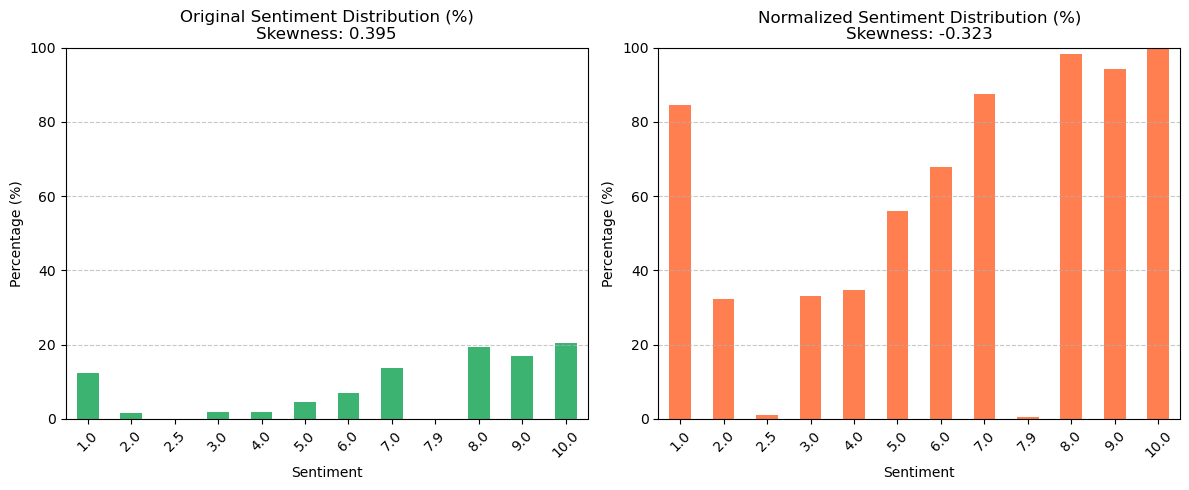


Normalized Distribution:
1.0: 84.5%
2.0: 32.4%
2.5: 0.9%
3.0: 33.2%
4.0: 34.7%
5.0: 56.0%
6.0: 67.9%
7.0: 87.6%
7.9: 0.5%
8.0: 98.3%
9.0: 94.1%
10.0: 100.0%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv(r"C:\Users\sahas\Downloads\hotel_reviews.csv")
df['sentiment'] = df['Rating(Out of 10)']

# Calculate percentage distribution of sentiment scores
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
sentiment_counts = sentiment_counts.sort_index()  # sort for clearer plots

# === RIGHT-SKEW NORMALIZATION FUNCTION ===
def normalize_right_skewed(data):
    log_data = np.log1p(data)  # log(1 + x) to handle 0s and reduce right skew
    scaled = (log_data / log_data.max()) * 100  # scale to 0–100 range
    return scaled

# === Skewness Calculation Function ===
def calc_skewness(data):
    mean = np.mean(data)
    std = np.std(data)
    return np.mean(((data - mean) / std) ** 3)

# Apply the transformation
normalized_values = normalize_right_skewed(sentiment_counts.values)
normalized_counts = pd.Series(normalized_values, index=sentiment_counts.index)

# Calculate skewness before and after
original_skew = calc_skewness(sentiment_counts.values)
new_skew = calc_skewness(normalized_values)
improvement = abs(original_skew) - abs(new_skew)

# === Print Skewness Info ===
print(f"Original Skewness: {original_skew:.3f}")
print(f"Normalized Skewness: {new_skew:.3f}")
print(f"Skewness Improvement: {improvement:.3f}")

# === Plot the Distributions ===
plt.figure(figsize=(12, 5))

# Original Plot
plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color='mediumseagreen')
plt.title(f'Original Sentiment Distribution (%)\nSkewness: {original_skew:.3f}')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Normalized Plot
plt.subplot(1, 2, 2)
normalized_counts.plot(kind='bar', color='coral')
plt.title(f'Normalized Sentiment Distribution (%)\nSkewness: {new_skew:.3f}')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# === Print Normalized Distribution ===
print("\nNormalized Distribution:")
for sentiment, percentage in normalized_counts.items():
    print(f"{sentiment}: {percentage:.1f}%")


In [8]:
len(df)

7001

In [9]:
print(df.head()) # first 5 row


   Index             Name                  Area Review_Date  \
0      0  Hotel The Pearl  Paharganj, New Delhi      Jul-23   
1      1  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
2      2  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
3      3  Hotel The Pearl  Paharganj, New Delhi      Aug-23   
4      4  Hotel The Pearl  Paharganj, New Delhi      Aug-23   

                            Rating_attribute  Rating(Out of 10)  \
0                 Best budget friendly hotel                9.0   
1                              Amazing place                9.0   
2               Overall good stay. Economic.                9.0   
3                                     Lovely                9.0   
4  Great hotel Great staff and great staying                9.0   

                                         Review_Text  sentiment  
0  Hotel the pearl is perfect place to stay in De...        9.0  
1  Location of the hotel is perfect. The hotel is...        9.0  
2                   

In [10]:
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,sentiment
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...,9.0
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...,9.0
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food.",9.0
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...,9.0
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...,9.0


In [11]:
# PREPARE DATA FOR BERT TRAINING

In [12]:
# 3. DATA PREPROCESSING

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to text
    return ' '.join(tokens)

# Apply preprocessing
print("Preprocessing text data...")
df['cleaned_review'] = df['Review_Text'].apply(preprocess_text)


# Remove empty reviews after preprocessing
df = df[df['cleaned_review'].str.len() > 0].reset_index(drop=True)






# replace with empty string
df["cleaned_review"] = df["cleaned_review"].replace("no comments available for this review", "")
#  Drop duplicate reviews (keep only the first occurrence)
df = df.drop_duplicates(subset=["cleaned_review"], keep="first")



# Reset index
df = df.reset_index(drop=True)

print(" Cleaned dataset shape:", df.shape)


Preprocessing text data...
 Cleaned dataset shape: (3623, 9)


In [15]:
len(df)

3623

In [16]:
# 1. Create a sorted list of unique sentiment labels
unique_sentiments = sorted(df['sentiment'].unique())

# 2. Manually map each unique sentiment to an integer
label_mapping = {sentiment: idx for idx, sentiment in enumerate(unique_sentiments)}

# 3. Encode the sentiment column using the mapping
df['sentiment_encoded'] = df['sentiment'].map(label_mapping)

# 4. Print the label mapping
print("Label Mapping:", label_mapping)


 

Label Mapping: {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3, 5.0: 4, 6.0: 5, 7.0: 6, 7.9: 7, 8.0: 8, 9.0: 9, 10.0: 10}


In [17]:
# 5. Prepare input (X) and target (y)
df['cleaned_review'] = df['Review_Text'].str.lower().str.replace(r'[^a-z0-9\s]', '', regex=True).str.strip()

X = df['cleaned_review'].tolist()  # .tolist() instead of .values to avoid numpy
y = df['sentiment_encoded'].tolist()

# 6. Manually split the dataset into train, val, test
# We'll simulate stratified split manually

# --- Group by sentiment for stratified sampling ---
from collections import defaultdict
import random

random.seed(42)  # for reproducibility

stratified_data = defaultdict(list)
for text, label in zip(X, y):
    stratified_data[label].append((text, label))

# Split into train, val, test (80%, 16%, 4%)
X_train, y_train = [], []
X_val, y_val = [], []
X_test, y_test = [], []

for label, items in stratified_data.items():
    random.shuffle(items)
    n = len(items)
    n_test = max(1, int(n * 0.2))
    n_val = max(1, int(n_test * 0.2))  # 20% of 20% = 4% of total
    n_test = n_test - n_val  # remaining goes to test

    test = items[:n_test]
    val = items[n_test:n_test + n_val]
    train = items[n_test + n_val:]

    X_test.extend([x[0] for x in test])
    y_test.extend([x[1] for x in test])
    X_val.extend([x[0] for x in val])
    y_val.extend([x[1] for x in val])
    X_train.extend([x[0] for x in train])
    y_train.extend([x[1] for x in train])

# 7. Print sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 2902
Validation set size: 141
Test set size: 580


In [18]:
# 6. BERT MODEL SETUP AND TRAINING

In [19]:
print("Label min:", np.min(y_train), "max:", np.max(y_train))


Label min: 0 max: 10


In [20]:
df['Rating(Out of 10)'].unique()

array([ 9. ,  8. , 10. ,  7. ,  6. ,  1. ,  4. ,  2. ,  3. ,  5. ,  7.9])

In [21]:
df.columns.tolist()
df.head()

,Index,Name,Area,Review_Date,Rating_attribute,Rating(Out of 10),Review_Text,sentiment,cleaned_review,sentiment_encoded
0,0,Hotel The Pearl,"Paharganj, New Delhi",Jul-23,Best budget friendly hotel,9.0,Hotel the pearl is perfect place to stay in De...,9.0,hotel the pearl is perfect place to stay in de...,9
1,1,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Amazing place,9.0,Location of the hotel is perfect. The hotel is...,9.0,location of the hotel is perfect the hotel is ...,9
2,2,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Overall good stay. Economic.,9.0,"Location, Indian food.",9.0,location indian food,9
3,3,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Lovely,9.0,The location and the hotel itself is great. Ne...,9.0,the location and the hotel itself is great nex...,9
4,4,Hotel The Pearl,"Paharganj, New Delhi",Aug-23,Great hotel Great staff and great staying,9.0,Friendly and smiling staffs.. The reception st...,9.0,friendly and smiling staffs the reception staf...,9


In [22]:
len(df)

3623

In [24]:
texts = df['cleaned_review'].dropna().tolist()  # or use 'Review_Text'
print(texts[:6977])

['hotel the pearl is perfect place to stay in delhi paharganj whole staff are very helpful informative rooms are clean and comfortable the hotels location was very convenient and we had a truly wonderful stay most recommended', 'location of the hotel is perfect the hotel is peaceful and nice the staff is very kind and nice rooms i recommend this hotel', 'location indian food', 'the location and the hotel itself is great next time i will stay here nice rooms with comfortable beds good attitude of staff they are helpful and explain you everything you ask them', 'friendly and smiling staffs the reception staff are so excellent and ready to help me any time location is fantastic near all the attractions room was big and comfortable', 'the location was really perfect we really enjoyed the hotel clean and comfortable rooms awesome breakfast great staff would totally recommend this hotel i really liked the place', 'nice cosy room well maintained and clean room bathroom was cleaned and bad was

In [25]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizerFast, BertConfig, BertForSequenceClassification, TrainingArguments, Trainer
import evaluate
import torch

#  Load CSV
df = pd.read_csv(r"C:\Users\sahas\Downloads\hotel_reviews.csv")

#  Clean & label
df = df.rename(columns={'Review_Text': 'text', 'Rating(Out of 10)': 'score'})
df.dropna(subset=['text', 'score'], inplace=True)

def map_score_to_sentiment(score):
    if score >= 7.5: 
        return 2  # Positive
    elif score >= 5.0:   
        return 1  # Neutral
    else:
        return 0  # Negative

df['label'] = df['score'].apply(map_score_to_sentiment)

#  Split data
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# Convert to HuggingFace Datasets
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['text', 'label']])

#  Train custom tokenizer
tokenizer = BertWordPieceTokenizer()
tokenizer.train(
    files=[r"C:\Users\sahas\Downloads\reviewtxt.txt"],
    vocab_size=30000,
    min_frequency=2,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]
)

#  Save and reload as Hugging Face tokenizer
tokenizer_path = "./my_tokenizer"
os.makedirs(tokenizer_path, exist_ok=True)
tokenizer.save_model(tokenizer_path)
hf_tokenizer = BertTokenizerFast.from_pretrained(tokenizer_path)

#  Tokenize datasets
def tokenize_function(example):
    return hf_tokenizer(example['text'], padding="max_length", truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Remove unused columns
columns_to_keep = ['input_ids', 'attention_mask', 'label']
train_dataset = train_dataset.remove_columns([col for col in train_dataset.column_names if col not in columns_to_keep])
val_dataset = val_dataset.remove_columns([col for col in val_dataset.column_names if col not in columns_to_keep])
test_dataset = test_dataset.remove_columns([col for col in test_dataset.column_names if col not in columns_to_keep])

#  Create BERT model from scratch
config = BertConfig(
    vocab_size=hf_tokenizer.vocab_size,
    hidden_size=256,
    num_hidden_layers=4,
    num_attention_heads=4,
    intermediate_size=512,
    num_labels=3
)
model = BertForSequenceClassification(config)

#  Define metrics
accuracy = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = torch.argmax(torch.tensor(logits), dim=1)
    return accuracy.compute(predictions=preds, references=labels)

# Training setup
training_args = TrainingArguments(
    output_dir='./results',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=20,
    weight_decay=0.01,
    logging_dir='./logs'
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Save final model & tokenizer
trainer.save_model("./bert_hotel_sentiment_custom")
hf_tokenizer.save_pretrained("./bert_hotel_sentiment_custom")

#  Final evaluation
results = trainer.evaluate(test_dataset)
print("Test set evaluation results:", results)


Map:   0%|          | 0/4895 [00:00<?, ? examples/s]

Map:   0%|          | 0/1049 [00:00<?, ? examples/s]

Map:   0%|          | 0/1050 [00:00<?, ? examples/s]

C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
500,0.930400
1000,0.762000
1500,0.675300
2000,0.640400
2500,0.604400
3000,0.581600
3500,0.550000
4000,0.542900
4500,0.526600
5000,0.515500


C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_mem

Test set evaluation results: {'eval_loss': 0.6278588771820068, 'eval_accuracy': 0.7371428571428571, 'eval_runtime': 12.1197, 'eval_samples_per_second': 86.636, 'eval_steps_per_second': 5.446, 'epoch': 20.0}


In [26]:
import joblib

# Point to your existing model folder
model_path = "./bert_hotel_sentiment_custom"

# Save the path for Django
joblib.dump(model_path, "bert_model_path.pkl")


['bert_model_path.pkl']

C:\Users\sahas\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


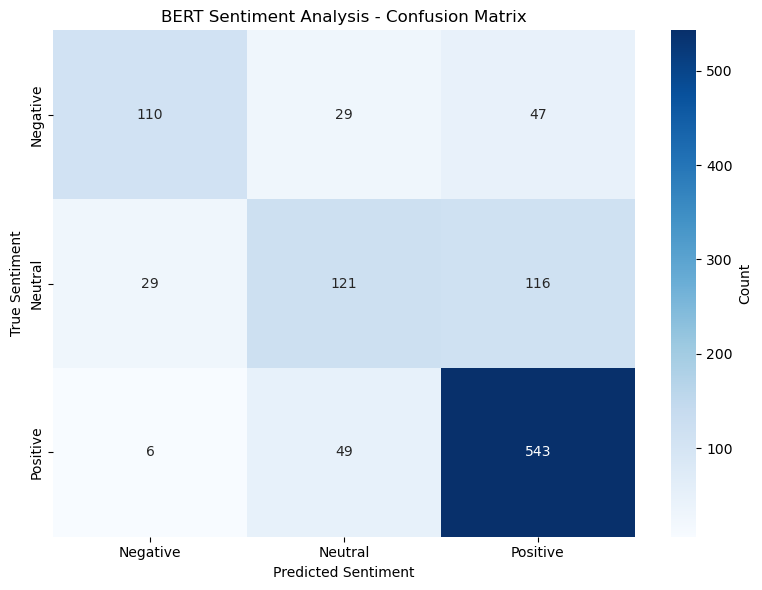


Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.59      0.66       186
     Neutral       0.61      0.45      0.52       266
    Positive       0.77      0.91      0.83       598

    accuracy                           0.74      1050
   macro avg       0.71      0.65      0.67      1050
weighted avg       0.73      0.74      0.72      1050


Overall Accuracy: 0.7371 (73.71%)


In [27]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# BERT Confusion Matrix
try:
    # Get predictions from the trained model
    predictions = trainer.predict(test_dataset)
    y_pred = np.argmax(predictions.predictions, axis=1)
    y_true = predictions.label_ids
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Define sentiment labels
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sentiment_labels, 
                yticklabels=sentiment_labels,
                cbar_kws={'label': 'Count'})
    
    plt.title('BERT Sentiment Analysis - Confusion Matrix')
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('True Sentiment')
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    
    print(classification_report(y_true, y_pred, target_names=sentiment_labels))
    
    # Print accuracy
    accuracy = np.sum(y_pred == y_true) / len(y_true)
    print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
except Exception as e:
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('BERT Confusion Matrix (Error)')
    plt.show()
    print(f"Error: {str(e)}")